# Tahu lah apa ini?

In [95]:
# Path to google drive folder
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002. Laporan-eksperimen
# %cd /content/drive/MyDrive/Colab Notebooks/Disertasi-Ahmad-Rofiqul/002.Experiment_SWI_16052024/

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest, VotingClassifier
from sklearn.neighbors import LocalOutlierFactor
from sklearn.svm import OneClassSVM
from sklearn.covariance import EllipticEnvelope
from pyod.models.hbos import HBOS
from sklearn.cluster import DBSCAN
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, average_precision_score, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator, OutlierMixin
from scipy.spatial.distance import mahalanobis

In [9]:
# Load the dataset
# file_path = '01.Dataset-Rofiqul/agriculture_dataset.csv'
# file_path = '01.Dataset-Rofiqul/Ujicoba3-29052024/agriculture_dataset.csv'
# file_path = 'dataset/agriculture_dataset.csv'
# file_path = 'dataset/09_05_1_AgricultureOutliersResult_30052024.csv'
hardvotings='dataset/09_05_4_1_AgricultureOutliers_HardVotingBased.csv'
softvotings='dataset/09_05_4_2_AgricultureOutliers_SoftVotingBased.csv'
# soft_voting_data.to_csv('dataset/09_05_4_2_AgricultureOutliers_SoftVotingBased.csv', index=False)
# file_path = 'dataset/09_05_3_0_AgricultureOutliersDetectionResults.csv'
hard = pd.read_csv(hardvotings)
soft = pd.read_csv(softvotings)


In [13]:
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.base import BaseEstimator, ClassifierMixin
import matplotlib.pyplot as plt
import seaborn as sns


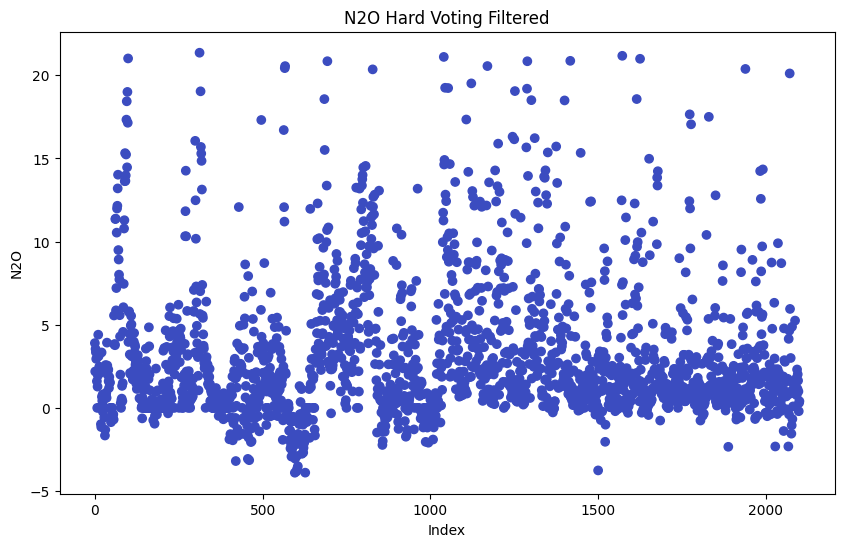

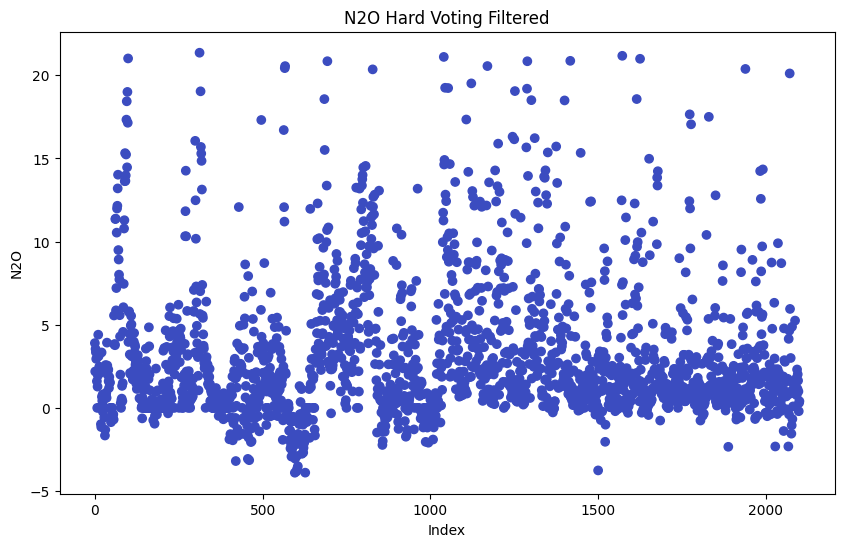

In [11]:

# Visualize the outliers

plt.figure(figsize=(10, 6))
plt.scatter(hard.index, hard['N2O'], c=hard['hard_voting'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('N2O')
plt.title('N2O Hard Voting Filtered')
# plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/001_N2O_IF_Outlier_Detection.png')
plt.show()

# Visualize the outliers

plt.figure(figsize=(10, 6))
plt.scatter(soft.index, soft['N2O'], c=soft['hard_voting'], cmap='coolwarm')
plt.xlabel('Index')
plt.ylabel('N2O')
plt.title('N2O Hard Voting Filtered')
# plt.savefig('01.Dataset-Rofiqul/Visual/BeforeRemoveOutliers/001_N2O_IF_Outlier_Detection.png')
plt.show()

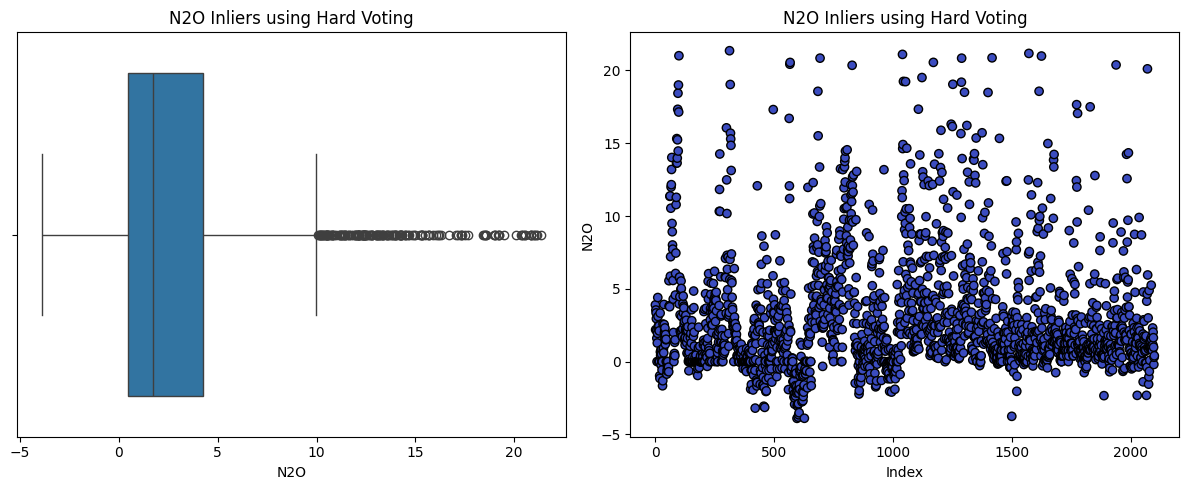

Jumlah Inliers hasil deteksi IF:2101


In [17]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=hard['N2O'], ax=axs[0])
axs[0].set_title('N2O Inliers using Hard Voting')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(hard.index, hard['N2O'], c=hard['hard_voting'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Inliers using Hard Voting')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
# plt.savefig('01.hardset-Rofiqul/Visual/BeforeRemoveOutliers/001_1_N2O_IF_Outlier_Detection.png')
plt.show()



# Calculate the number of outliers detected by Isolation Forest in the hardset
if_outliers_count = (hard['hard_voting'] == 1).sum()
print('Jumlah Inliers hasil deteksi IF:'+str(int(if_outliers_count)))


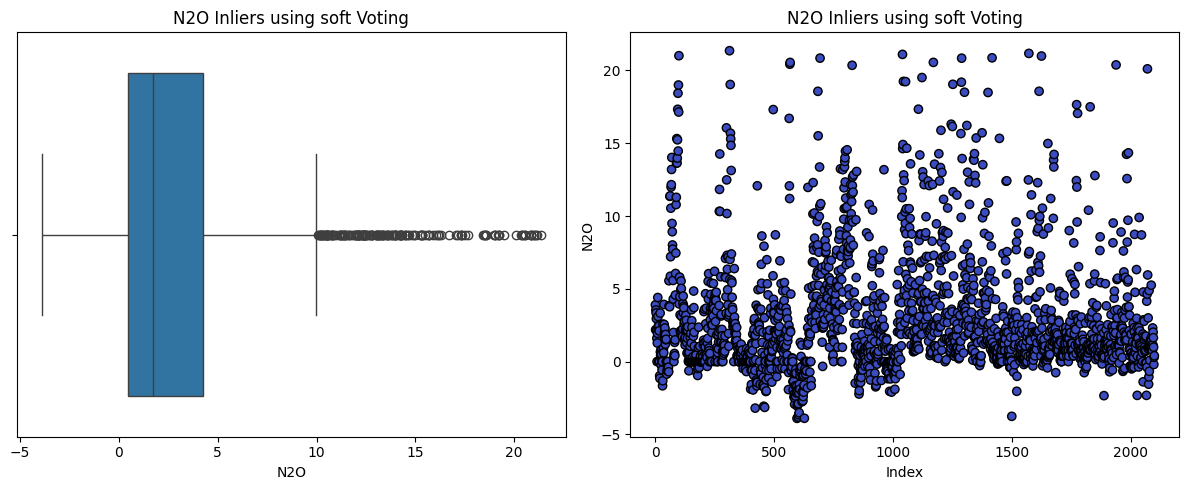

Jumlah Inliers hasil deteksi IF:2101


In [19]:
# Create a figure with 2 subplots (1 row, 2 columns)
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Visualize the outliers using a box plot
sns.boxplot(x=soft['N2O'], ax=axs[0])
axs[0].set_title('N2O Inliers using soft Voting')
axs[0].set_xlabel('N2O')

# Visualize the outliers using a scatter plot
scatter = axs[1].scatter(soft.index, soft['N2O'], c=soft['average_voting'], cmap='coolwarm', edgecolor='k')
axs[1].set_title('N2O Inliers using soft Voting')
axs[1].set_xlabel('Index')
axs[1].set_ylabel('N2O')

# Show the combined figure
plt.tight_layout()
# plt.savefig('01.softset-Rofiqul/Visual/BeforeRemoveOutliers/001_1_N2O_IF_Outlier_Detection.png')
plt.show()



# Calculate the number of outliers detected by Isolation Forest in the softset
if_outliers_count = (soft['average_voting'] == 1).sum()
print('Jumlah Inliers hasil deteksi IF:'+str(int(if_outliers_count)))


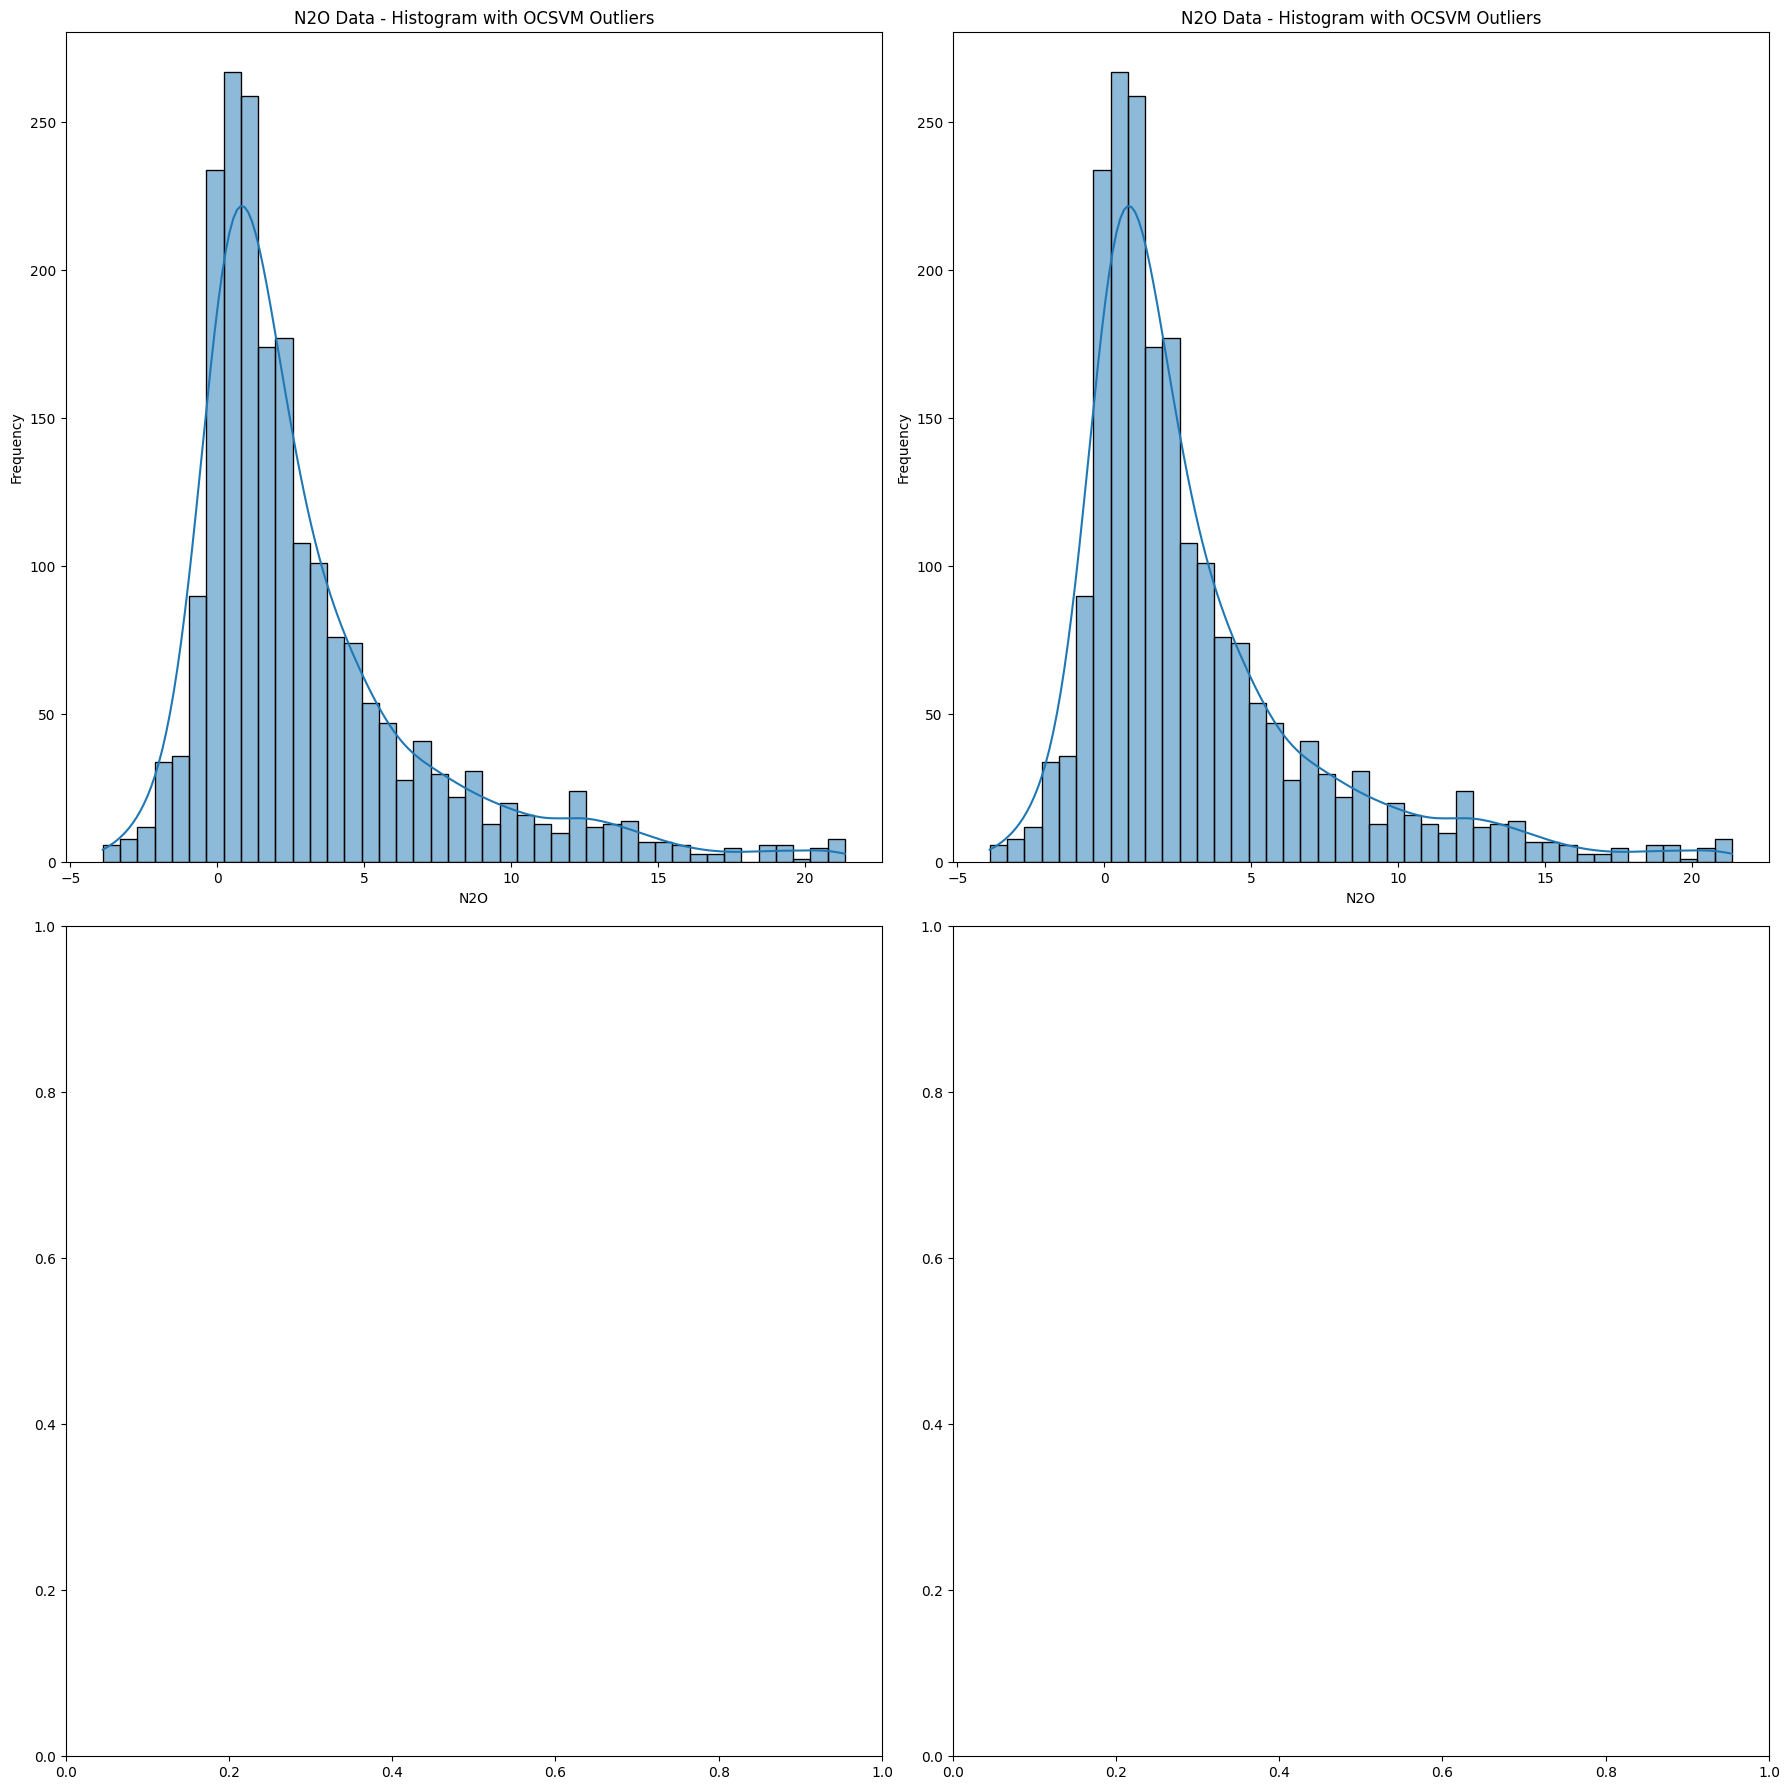

In [30]:
# Visualize the outliers using box plots, histograms, and scatter plots
fig, axs = plt.subplots(2, 2, figsize=(18, 18))

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(soft['N2O'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[0, 0].set_xlabel('N2O')
axs[0, 0].set_ylabel('Frequency')

# Histogram - N2O Data with OCSVM Outliers
sns.histplot(hard['N2O'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('N2O Data - Histogram with OCSVM Outliers')
axs[0, 1].set_xlabel('N2O')
axs[0, 1].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()